In [ ]:
# ==========================================
# 🌽 Crop Yield Analysis with Remote Sensing
# IEEE J-STARS Special Issue: Data Quality
# ==========================================

# 📦 1. Install Required Libraries (if needed)
# Uncomment below lines if libraries are not preinstalled
!pip install pandas matplotlib seaborn scikit-learn

In [ ]:
# 📥 2. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data_Corn.csv to Data_Corn.csv


In [ ]:
# 🧼 4. Read and Clean the Dataset
df_raw = pd.read_csv(next(iter(uploaded)))
df = df_raw[1:].copy()  # Remove the first row (repeated headers)
df.columns = df_raw.iloc[0]  # Set proper headers
df.reset_index(drop=True, inplace=True)

<ipython-input-4-c251db568cdd>:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(next(iter(uploaded)))


In [ ]:
# 🧹 5. Convert Numeric Columns
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

<ipython-input-5-ccb5143d3ea3>:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


In [ ]:
# 🔍 6. Basic Data Overview
print("Shape of dataset:", df.shape)
print("Columns:\n", df.columns.tolist())
df.describe(include='all').T

Shape of dataset: (12375, 130)
Columns:
 [np.float64(nan), 'year', 'yield', 'STATE', 'GEOID', 'X', 'Y', 'GPP_1', 'GPP_2', 'GPP_3', 'GPP_4', 'GPP_5', 'GPP_6', 'GPP_7', 'GPP_8', 'GPP_9', 'GPP_10', 'GPP_11', 'NDVI_1', 'EVI_1', 'NDVI_2', 'EVI_2', 'NDVI_3', 'EVI_3', 'NDVI_4', 'EVI_4', 'NDVI_5', 'EVI_5', 'NDVI_6', 'EVI_6', 'NDVI_7', 'EVI_7', 'NDVI_8', 'EVI_8', 'NDVI_9', 'EVI_9', 'NDVI_10', 'EVI_10', 'NDVI_11', 'EVI_11', 'NDVI_12', 'EVI_12', 'PPT_1', 'TMEAN_1', 'TMIN_1', 'TMAX_1', 'TDMEAN_1', 'VPDMIN_1', 'VPDMAX_1', 'PPT_2', 'TMEAN_2', 'TMIN_2', 'TMAX_2', 'TDMEAN_2', 'VPDMIN_2', 'VPDMAX_2', 'PPT_3', 'TMEAN_3', 'TMIN_3', 'TMAX_3', 'TDMEAN_3', 'VPDMIN_3', 'VPDMAX_3', 'PPT_4', 'TMEAN_4', 'TMIN_4', 'TMAX_4', 'TDMEAN_4', 'VPDMIN_4', 'VPDMAX_4', 'PPT_5', 'TMEAN_5', 'TMIN_5', 'TMAX_5', 'TDMEAN_5', 'VPDMIN_5', 'VPDMAX_5', 'PPT_6', 'TMEAN_6', 'TMIN_6', 'TMAX_6', 'TDMEAN_6', 'VPDMIN_6', 'VPDMAX_6', 'PPT_7', 'TMEAN_7', 'TMIN_7', 'TMAX_7', 'TDMEAN_7', 'VPDMIN_7', 'VPDMAX_7', 'PPT_8', 'TMEAN_8', 'TMIN_8',

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,,,,,,,,,,,
NaN,12372.0,NaN,NaN,NaN,6185.500000,3571.633100,0.000000,3092.750000,6185.500000,9278.250000,12371.000000
year,12372.0,NaN,NaN,NaN,2012.762528,4.330389,2006.000000,2009.000000,2013.000000,2016.000000,2020.000000
yield,12372.0,NaN,NaN,NaN,152.320724,36.137662,18.000000,131.000000,158.000000,178.000000,247.000000
STATE,12372.0,NaN,NaN,NaN,27.910120,12.037341,5.000000,18.000000,27.000000,38.000000,55.000000
GEOID,12372.0,NaN,NaN,NaN,28060.087132,12068.261356,5001.000000,19001.000000,27091.000000,38047.000000,55141.000000
...,...,...,...,...,...,...,...,...,...,...,...
organic_matter,12372.0,NaN,NaN,NaN,3.829973,3.135992,0.793735,2.168290,2.879628,4.142060,43.444193
pH,12372.0,NaN,NaN,NaN,6.442660,0.491772,4.929781,6.167122,6.405942,6.740808,7.649582
saturated_hc,12372.0,NaN,NaN,NaN,14.126895,14.828567,1.570644,7.455782,9.167130,13.734221,129.624056


In [ ]:
# ⚠️ 7. Data Quality Assessment
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_summary = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent})
print("Missing Values Summary:\n", missing_summary[missing_summary['Missing Count'] > 0])

Missing Values Summary:
                 Missing Count  Missing %
0                                       
NaN                         3   0.024242
year                        3   0.024242
yield                       3   0.024242
STATE                       3   0.024242
GEOID                       3   0.024242
...                       ...        ...
organic_matter              3   0.024242
pH                          3   0.024242
saturated_hc                3   0.024242
sand_percent                3   0.024242
wilting_point               3   0.024242

[122 rows x 2 columns]


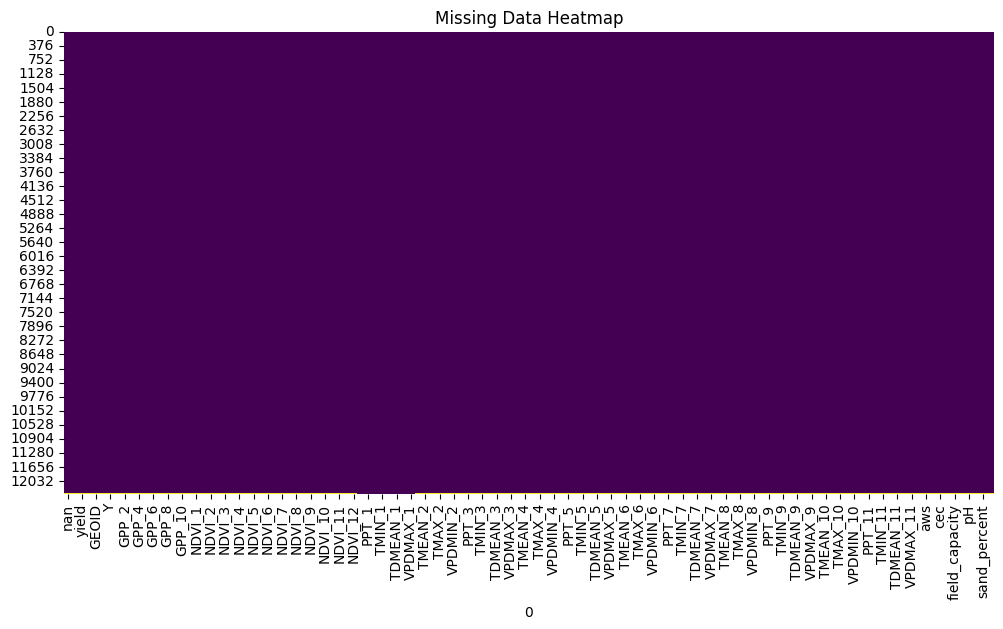

In [ ]:
# 📊 8. Visualize Missing Data
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [ ]:
# 🧪 9. Fix GPP Scaling Issue
gpp_columns = [col for col in df.columns if 'GPP' in str(col)]
df[gpp_columns] = df[gpp_columns].astype(float) / 10000


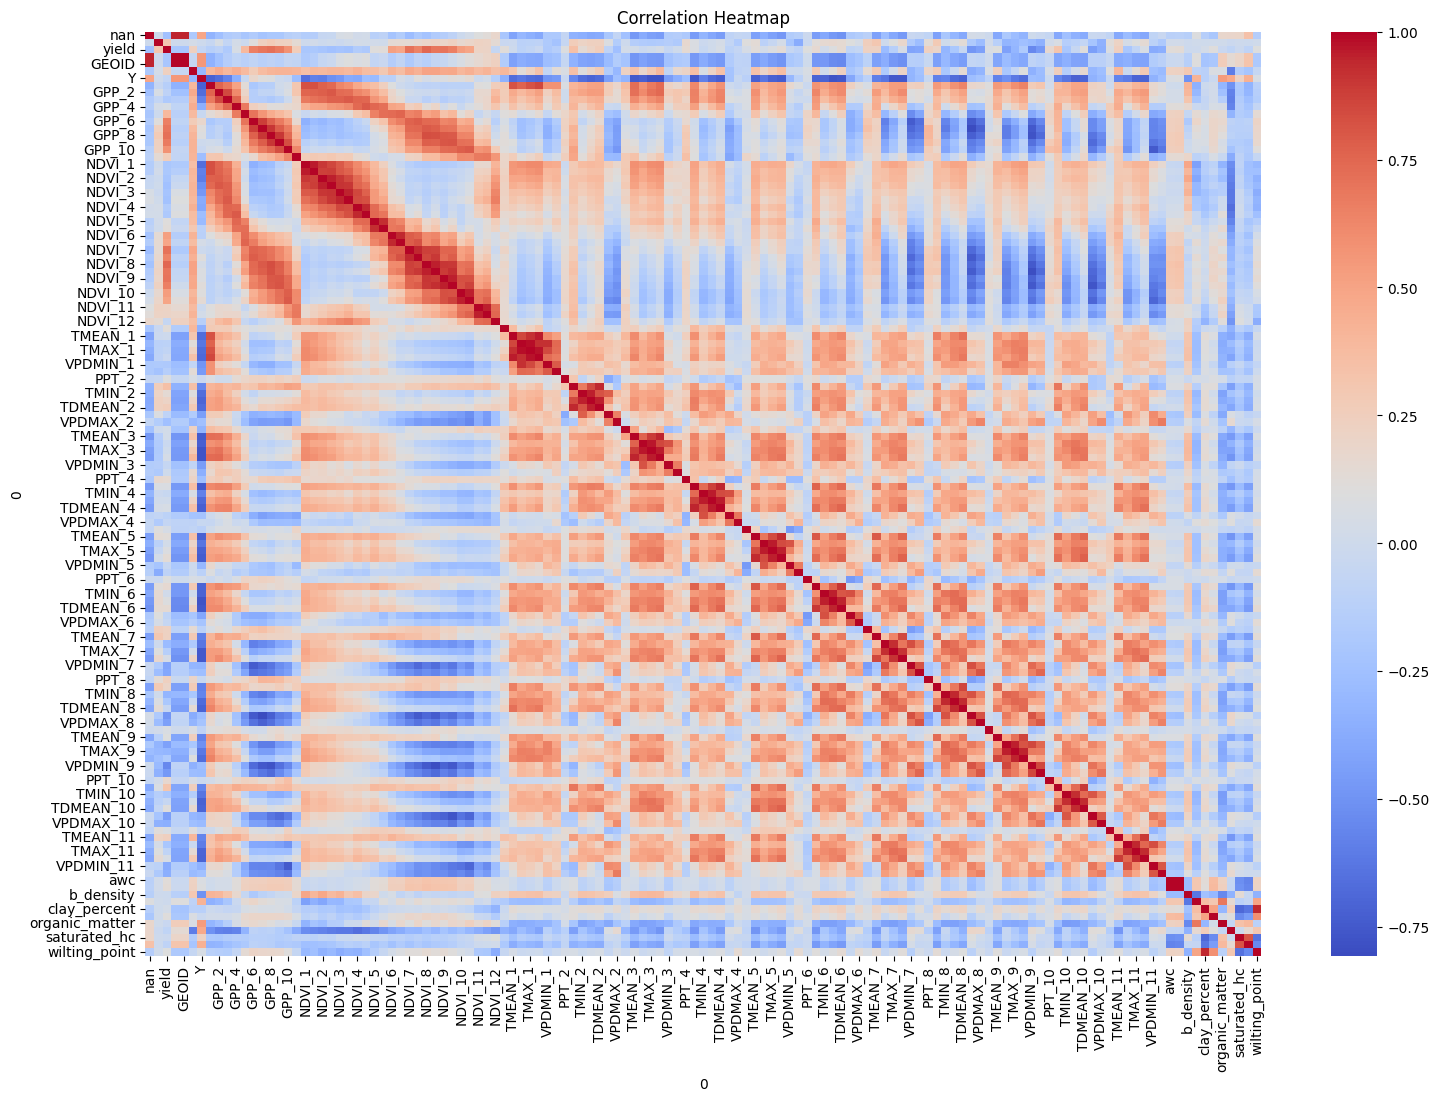

In [ ]:
# 📈 10. Correlation Heatmap
numeric_cols = df.select_dtypes(include=['float64', 'int']).columns
plt.figure(figsize=(18, 12))
sns.heatmap(df[numeric_cols].corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# 🎯 11. Yield Prediction Modeling
target = 'yield'
features = gpp_columns + [
    'NDVI_1', 'NDVI_2', 'NDVI_3', 'EVI_1', 'EVI_2', 'EVI_3',
    'PPT_1', 'TMEAN_1', 'VPDMIN_1', 'cec', 'clay_percent', 'organic_matter'
]

# Remove rows with missing values in selected columns
df_model = df[features + [target]].dropna()

X = df_model[features]
y = df_model[target].astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📉 RMSE: {rmse:.2f}")
print(f"📊 R² Score: {r2:.2f}")



📉 RMSE: 15.10
📊 R² Score: 0.82


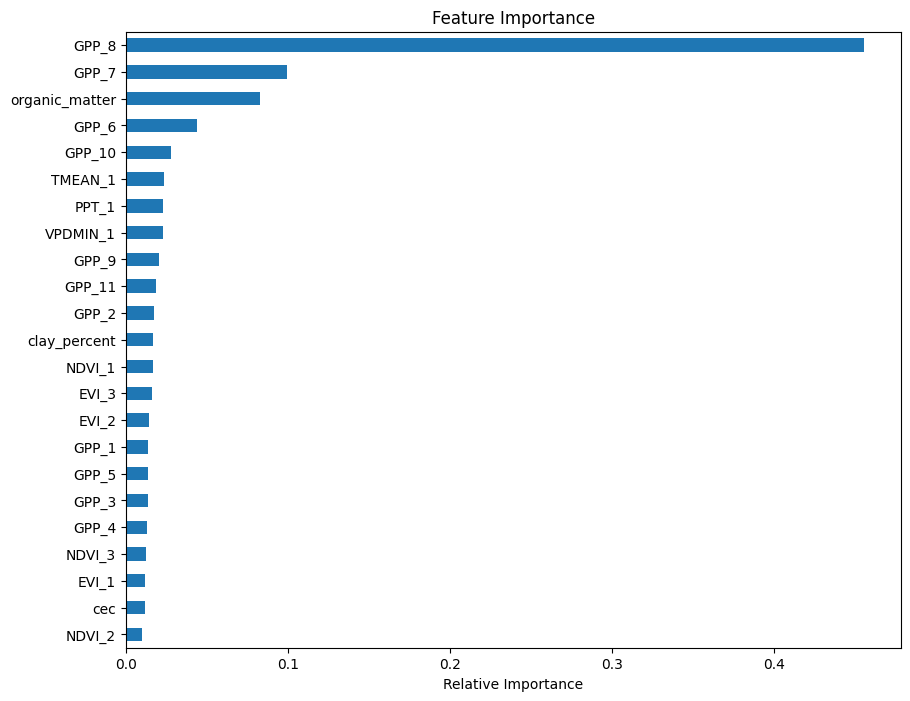

In [ ]:
# 📌 12. Feature Importance
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 8))
plt.title("Feature Importance")
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
# Simulate missing data in NDVI to test model robustness
df_quality_test = df_model.copy()
np.random.seed(42)
missing_mask = np.random.rand(*df_quality_test['NDVI_1'].shape) < 0.2
df_quality_test.loc[missing_mask, 'NDVI_1'] = np.nan

# Drop NA and retrain
df_qtest = df_quality_test.dropna()
X_qtest = df_qtest[features]
y_qtest = df_qtest[target].astype(float)

X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(X_qtest, y_qtest, test_size=0.2, random_state=42)

model_q = RandomForestRegressor(n_estimators=100, random_state=42)
model_q.fit(X_train_q, y_train_q)
y_pred_q = model_q.predict(X_test_q)

rmse_q = np.sqrt(mean_squared_error(y_test_q, y_pred_q))
r2_q = r2_score(y_test_q, y_pred_q)

print(f"With simulated missing NDVI:")
print(f"📉 RMSE: {rmse_q:.2f}")
print(f"📊 R² Score: {r2_q:.2f}")

With simulated missing NDVI:
📉 RMSE: 15.78
📊 R² Score: 0.81


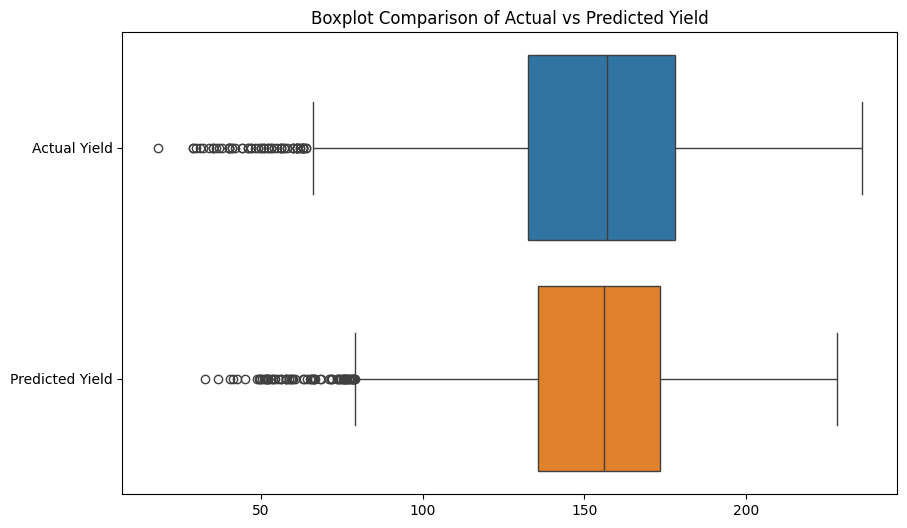

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=[y_test.values, y_pred], orient='h')
plt.yticks([0, 1], ['Actual Yield', 'Predicted Yield'])
plt.title("Boxplot Comparison of Actual vs Predicted Yield")
plt.show()

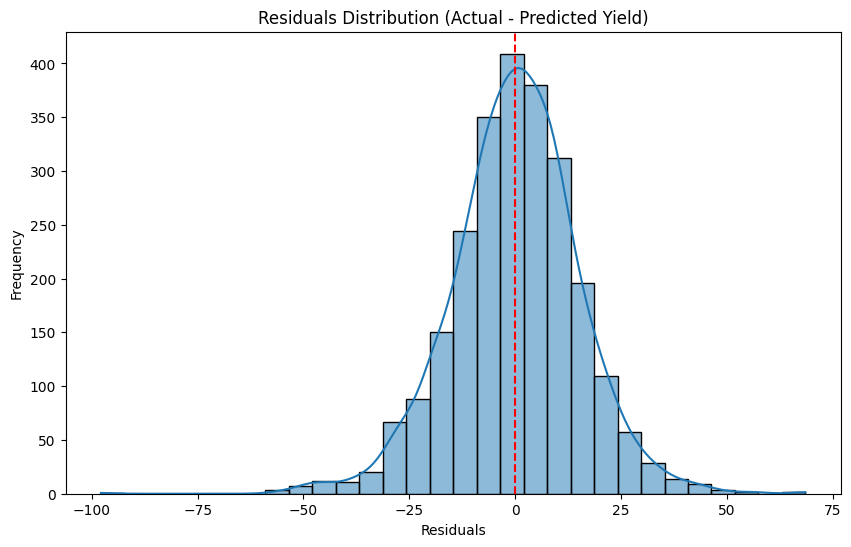

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution (Actual - Predicted Yield)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--')
plt.show()

In [ ]:
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Residual': residuals
})
results_df.to_csv("yield_prediction_results.csv", index=False)
print("📁 Results saved for use in paper figures.")

📁 Results saved for use in paper figures.


In [ ]:
# 📊 Metrics Table
metrics_table = pd.DataFrame({
    'Metric': ['RMSE', 'R² Score'],
    'Value': [rmse, r2]
})
print("\n📈 Model Performance Summary:")
print(metrics_table.to_string(index=False))


📈 Model Performance Summary:
  Metric     Value
    RMSE 15.096761
R² Score  0.824738


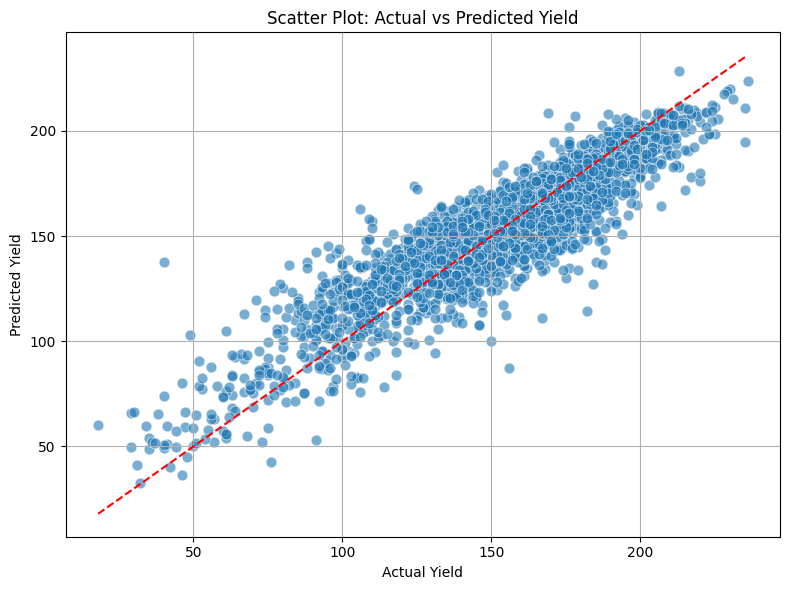

In [ ]:
#19. Figure: Actual vs Predicted Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Scatter Plot: Actual vs Predicted Yield")
plt.grid(True)
plt.tight_layout()
plt.savefig("scatter_actual_vs_predicted.png", dpi=300)
plt.show()

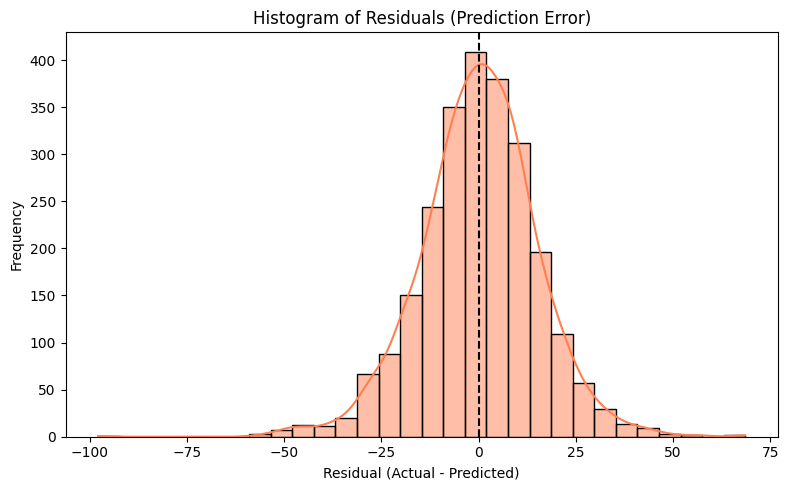

In [ ]:
#20. Figure: Residual Histogram
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color='coral')
plt.axvline(0, color='black', linestyle='--')
plt.title("Histogram of Residuals (Prediction Error)")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("residuals_histogram.png", dpi=300)
plt.show()

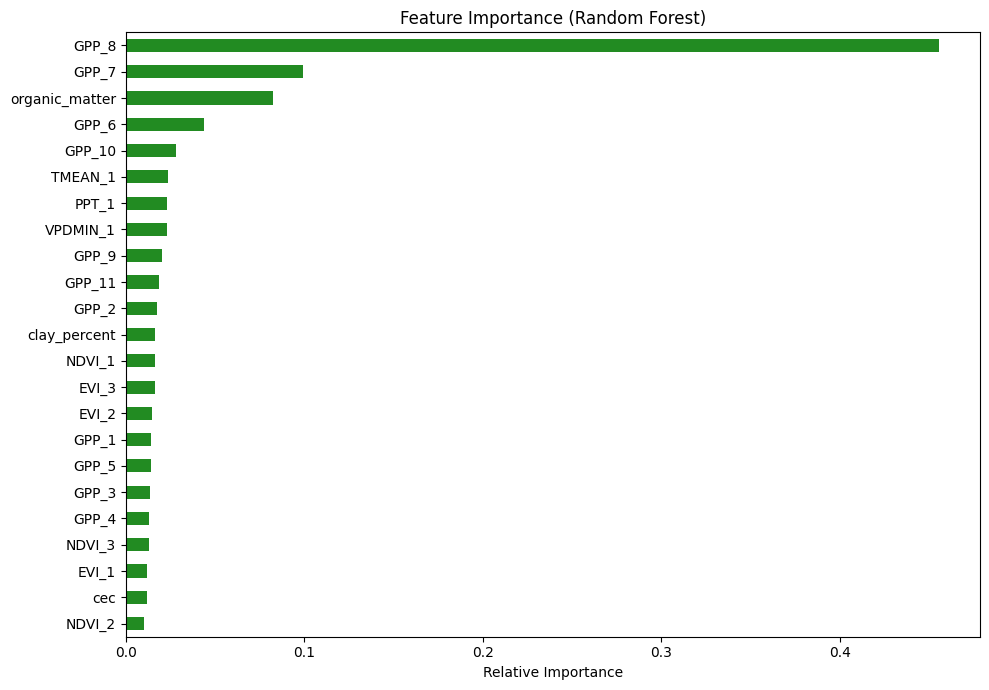

In [ ]:
#22. Figure: Feature Importance (Already Done in Section 12)
plt.figure(figsize=(10, 7))
importances.sort_values(ascending=True).plot(kind='barh', color='forestgreen')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.savefig("feature_importance.png", dpi=300)
plt.show()

In [ ]:
#23. Table: Feature Correlation with Yield
correlations = df[features + ['yield']].corr()['yield'].drop('yield').sort_values(ascending=False)
correlation_table = correlations.reset_index()
correlation_table.columns = ['Feature', 'Correlation with Yield']
print("📊 Feature Correlation Table:")
print(correlation_table)
correlation_table.to_csv("feature_correlation_table.csv", index=False)

📊 Feature Correlation Table:
           Feature  Correlation with Yield
0            GPP_8                0.714791
1            GPP_7                0.693836
2            GPP_9                0.671889
3            GPP_6                0.656516
4           GPP_10                0.578559
5            GPP_5                0.392209
6           GPP_11                0.261794
7            PPT_1                0.123106
8            GPP_4                0.053553
9     clay_percent                0.029720
10             cec               -0.002502
11         TMEAN_1               -0.002868
12  organic_matter               -0.031990
13           GPP_2               -0.096289
14           GPP_1               -0.129162
15           GPP_3               -0.174151
16        VPDMIN_1               -0.182569
17           EVI_1               -0.197819
18          NDVI_1               -0.200746
19          NDVI_2               -0.219178
20          NDVI_3               -0.227099
21           EVI_3       


📊 Model Comparison:
Random Forest - RMSE: 15.10, R²: 0.82
XGBoost       - RMSE: 14.58, R²: 0.84


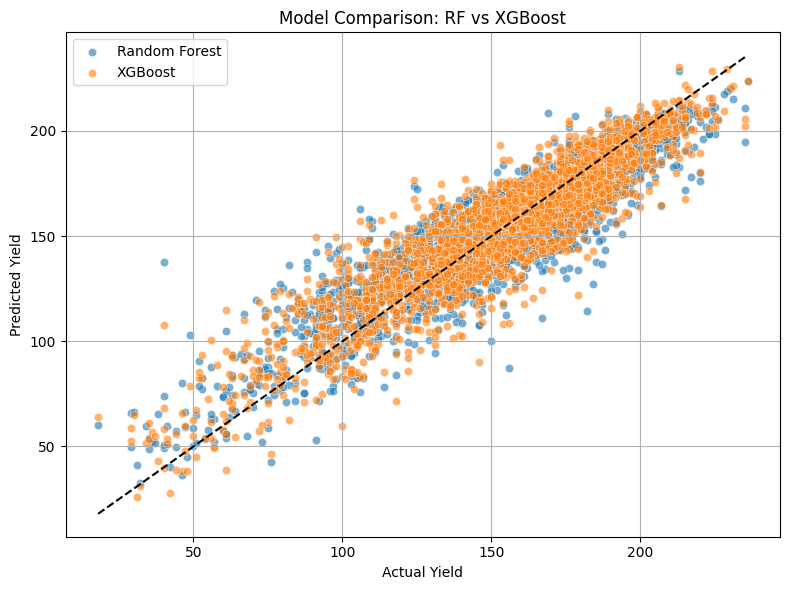

In [ ]:
#25. Compare Multiple Models: XGBoost vs Random Forest
from xgboost import XGBRegressor

# Same train-test split as before
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\n📊 Model Comparison:")
print(f"Random Forest - RMSE: {rmse:.2f}, R²: {r2:.2f}")
print(f"XGBoost       - RMSE: {rmse_xgb:.2f}, R²: {r2_xgb:.2f}")

# Plot comparison
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, label='Random Forest', alpha=0.6)
sns.scatterplot(x=y_test, y=y_pred_xgb, label='XGBoost', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Model Comparison: RF vs XGBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("model_comparison_rf_xgb.png", dpi=300)
plt.show()

In [ ]:
#26. Inject Missing Values to Test Model Robustness
df_corrupt = df_model.copy()
np.random.seed(42)

# Introduce missing values into NDVI_1 (~20% missing)
mask_missing = np.random.rand(len(df_corrupt)) < 0.2
df_corrupt.loc[mask_missing, 'NDVI_1'] = np.nan

df_corrupt_clean = df_corrupt.dropna()
X_c = df_corrupt_clean[features]
y_c = df_corrupt_clean[target]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42)
model_c = RandomForestRegressor(n_estimators=100, random_state=42)
model_c.fit(X_train_c, y_train_c)
y_pred_c = model_c.predict(X_test_c)

rmse_c = np.sqrt(mean_squared_error(y_test_c, y_pred_c))
r2_c = r2_score(y_test_c, y_pred_c)

print(f"\n🧪 Impact of Missing NDVI_1:")
print(f"RMSE (with missing): {rmse_c:.2f}")
print(f"R² (with missing): {r2_c:.2f}")


🧪 Impact of Missing NDVI_1:
RMSE (with missing): 15.78
R² (with missing): 0.81


In [ ]:
#27. Simulate Sensor Alignment Error (Column Shift)
df_misaligned = df_model.copy()

# Shift GPP values by 1 time step
for i in range(1, len(gpp_columns)):
    df_misaligned[gpp_columns[i]] = df_model[gpp_columns[i-1]]

# Train and evaluate with misaligned GPP
X_mis = df_misaligned[features]
y_mis = df_misaligned[target]

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_mis, y_mis, test_size=0.2, random_state=42)
model_m = RandomForestRegressor(n_estimators=100, random_state=42)
model_m.fit(X_train_m, y_train_m)
y_pred_m = model_m.predict(X_test_m)

rmse_m = np.sqrt(mean_squared_error(y_test_m, y_pred_m))
r2_m = r2_score(y_test_m, y_pred_m)

print(f"\n🚨 Impact of Simulated Sensor Misalignment (GPP shift):")
print(f"RMSE (misaligned): {rmse_m:.2f}")
print(f"R² (misaligned): {r2_m:.2f}")


🚨 Impact of Simulated Sensor Misalignment (GPP shift):
RMSE (misaligned): 15.24
R² (misaligned): 0.82
